<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220427_ml_03_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 19.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=26b6621d5cd0e1b6650bc314195ad79634832099f71a7a1caa21c9124d4621b2
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# SVM (Support Vector Machines)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 (복잡한 분류문제)

- 서포트 벡터 머신을 분류와 회귀에 모두 사용할 수 있음 <br>
(선형, 비선형 분류, 회귀, 이상치 탐색에도 사용되는 다목적 머신러닝 모델)

In [ ]:
# 경고문 무시
from warnings import filterwarnings
filterwarnings('ignore')

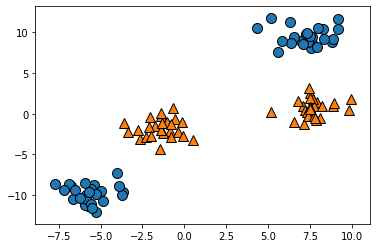

In [ ]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
X, y = make_blobs(centers=4, random_state=8)

# 이진 분류 세트 시각화
# 클래스 2개로 분리, 이진분류
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

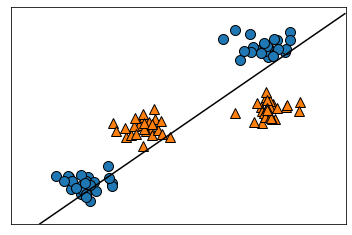

In [ ]:
# 선형 분류
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않음

## Linear SVC

[LinearSVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
```
LinearSVC(penalty, loss, dual, tol, C, multi_class, fit_intercept, intercept_scaling, class_weight, verbose, random_state, max_iter)
```
- <font color=yellow> penalty : 규제에 사용 된 기준을 지정 (l1, l2) – default : l2 </font>
- loss : 손실함수
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font color=yellow> C : 규제 강도 </font>
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- verbose : 동작 과정에 대한 출력 메시지
- random_state : 난수 seed 설정
- max_iter : 계산에 사용할 작업 수

In [2]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.svm import LinearSVC

In [ ]:
  # 데이터 로드
  X, y = make_forge()
  X.shape, y.shape

((26, 2), (26,))

In [ ]:
# 모델 학습
model = LinearSVC(C=0.1)
model.fit(X,y)

LinearSVC(C=0.1)

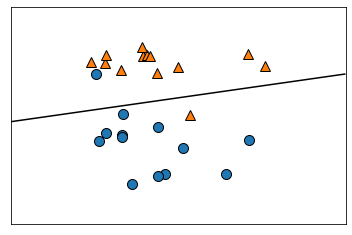

In [ ]:
# 결정경계 시각화
mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

### C 값의 변화에 따른 결정경계의 변화


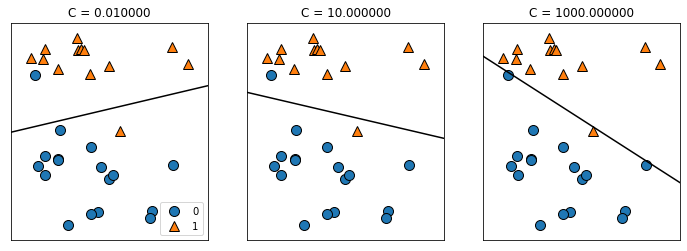

In [ ]:
# linear SVC 결정경계 변화
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 그림은 아주 작은 C 값 때문에 클래스 0은 아래쪽에 1은 위쪽에 대부분 배치, 2개가 잘못 분류 (결정경계가 수평에 가까움)
- C 값이 올라가면 결정경계가 기울어지며 최종적으로 클래스 0은 모두 아래쪽에 위치됨 -> 과대 적합

### Linear SVC 실습 01

와인 데이터 분류

In [ ]:
from sklearn.datasets import load_wine

# 데이터 로드
wine = load_wine()
type(wine)
wine.keys()

# print( wine.DESCR )
print( wine.data.shape )
print( wine.target_names )

(178, 13)
['class_0' 'class_1' 'class_2']


In [ ]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(133, 13)

In [ ]:
from pandas.core.common import random_state
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(C=0.1,max_iter=10000, random_state=0)
model.fit(X_train, y_train)

LinearSVC(C=0.1, max_iter=10000, random_state=0)

In [ ]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9699248120300752, 0.9333333333333333)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

### Linear SVC 실습 02

붓꽃 데이터 분류

In [ ]:
# 데이터 로드
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(112, 4)

In [ ]:
# 모델학습
from pandas.core.common import random_state
from sklearn.svm import LinearSVC

model = LinearSVC(C=10, max_iter=10000, random_state=2)
model.fit(X_train, y_train)

LinearSVC(C=10, max_iter=10000, random_state=2)

In [ ]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9910714285714286, 0.9473684210526315)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2])

선형 모델과 비선형 특징

- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적

- 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것

특성을 추가하여 입력 특성을 확장 (2차원 -> 3차원)

- 특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터 세트

- (특성0, 특성1) -> (특성0, 특성1, 특성 ** 2)
- 3차원 산점도로 표현

Matplotlib은 mpl_tookits라는 모듈로 3차원 그래프를 그릴 수 있다.

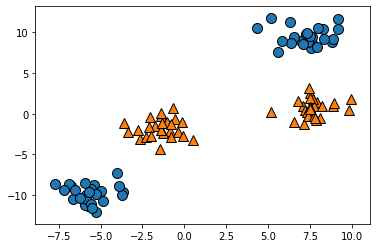

In [ ]:
X, y = make_blobs(centers=4, random_state=8)

# 이진 분류 세트 시각화
# 클래스 2개로 분리, 이진분류
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

Text(0.5, 0, 'feature 1')

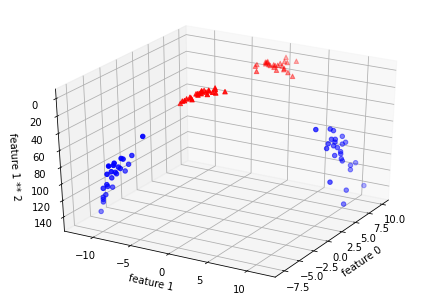

In [ ]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가 / 특성이 2개-> 3개(3차원)이됨
X_new = np.hstack( [X, X[:,1:]**2] )
X.shape, X_new.shape

# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig, elev = -150, azim=-30)

# 원본데이터
# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = (y==0)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker='o')

# ~ 비트 NOT : x의 비트를 뒤집음
mask = ~mask
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='r', marker='^')

ax.set_zlabel('feature 1 ** 2')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

SVM을 이용하여 분류

- 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분
- 확장한 3차원 데이터 세트에서 선형 SVM이 만든 결정 경계

Text(0.5, 0, 'feature 1')

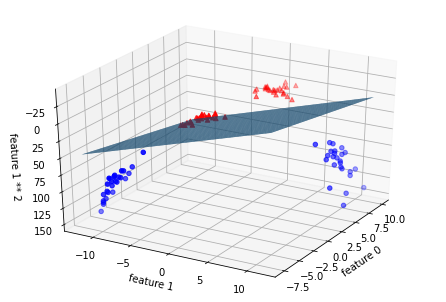

In [ ]:
model = LinearSVC().fit(X_new, y)
w,b= model.coef_.ravel(), model.intercept_
#      가중치           ,    절편

# 선형 결정 경계 그리기
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=-30)

xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50 )
                # 시작              끝                 데이터 갯수
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50 )

XX, YY = np.meshgrid(xx, yy)
zz = -( w[0]*XX + w[1]*YY + b) / w[2]
    # ( x의 가중치, y의 가중치, 절편 )

ax.plot_surface(XX, YY, zz) # 면과 면과 면이 만나서 새로운 면을 만듦

mask = (y==0)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker='o')

# ~ 비트 NOT : x의 비트를 뒤집음
mask = ~mask
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='r', marker='^')

ax.set_zlabel('feature 1 ** 2')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [ ]:
# 분류 결과 시각화


- 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님
- 직선보다 타원에 가까운 모습을 확인

## 커널 기법 (Kernel trick)

- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들 수 있음

- 하지만, 어떤 특성을 추가해야 할지 알 수 없고, 특성을 많이 추가하면 연산 비용이 커짐

- 커널 기법 : 새로운 특성을 만들지 않고 고차원 분류기를 학습시킬 수 있음 (데이터 포인트들의 거리를 계산 - 스칼라 곱)

- 고차원 공간 맵핑 방법 : 가우시안 커널, RBF (Radial Basis Function) 커널

- 주로 RBF 커널이 사용

## SVM

- Support Vector : 클래스 사이의 경계에 위치한 데이터 포인트

- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 -> SVC 객체의 dual_coef_ 속성에 저장

사용한 서보트 백터 수 : 12


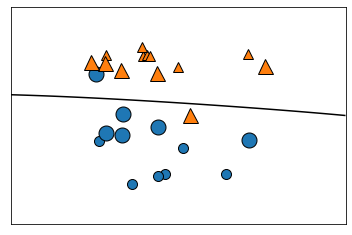

In [ ]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC
from mglearn.datasets import make_forge

X, y = make_forge()
X.shape, y.shape

model = SVC(C =1, gamma='scale').fit(X,y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 백터
sv = model.support_vectors_
print('사용한 서보트 백터 수 :', len(sv))
sv_y = model.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:, 1], sv_y, s=15)

plt.show()

- 선형이 아닌 부드러운 비선형 경계를 만들어냄
- C와 gamma 두 매개변수를 사용

#### SVM의 튜닝 (C, gamma)

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당
 - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
 - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
 - 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한

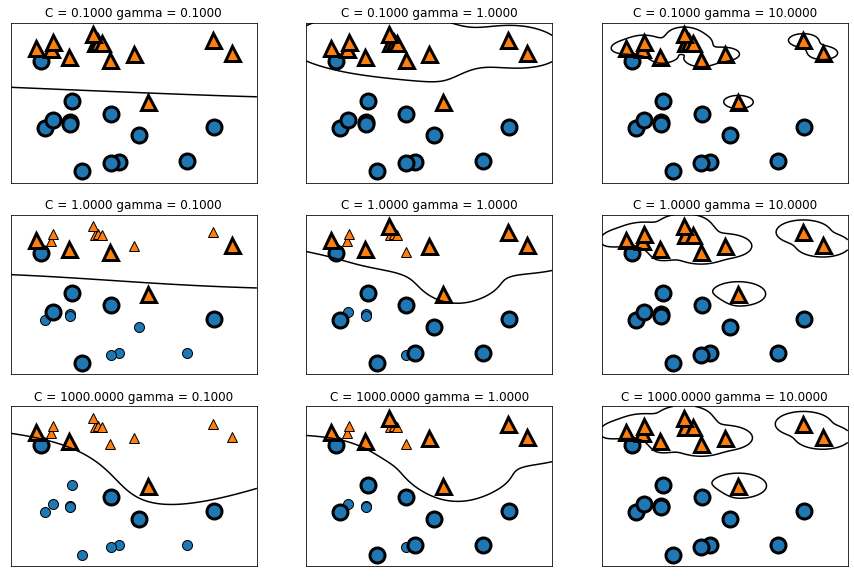

In [ ]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 10) )

for C, axrow in zip( [-1, 0, 3], axes ):
  for gamma, axcol in zip( [-1, 0, 1], axrow ):
    mglearn.plots.plot_svm(C, gamma, axcol)

#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from pandas.core.common import random_state
from sklearn.svm import LinearSVC

# 데이터 로드
cancer = load_breast_cancer()
cancer.keys()

# 모델 학습
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = SVC(C=1, gamma= 0.1).fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.6293706293706294)

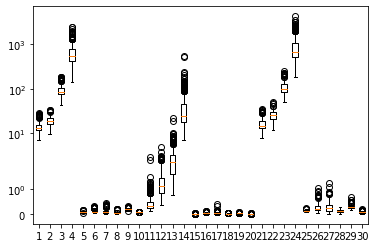

In [ ]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)
plt.boxplot(X_train)
plt.yscale('symlog') # y스케일을 로그값으로 줌
plt.show()

- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [ ]:
from sklearn.preprocessing import MinMaxScaler # 전처리 라이브러리

scaler = MinMaxScaler()
scaler.fit(X_train) # 기준점

X_train_scaled = scaler.transform(X_train) # 적용하겠다.
X_test_scaled = scaler.transform(X_test)

X_train_scaled.min(axis=0), X_train_scaled.max(axis = 0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

##### 스케일링된 데이터를 SVC에 적용하기

In [ ]:
# gamma 파라미저 조정
# 모델학습
model = SVC(C=1, gamma= 0.1).fit(X_train_scaled, y_train)

# 평가
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9577464788732394, 0.951048951048951)

In [ ]:
# C 파라미터 조정
# 모델학습
model = SVC(C=10, gamma= 0.1).fit(X_train_scaled, y_train)

# 평가
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9835680751173709, 0.965034965034965)

## SVM 회귀

- SVM 분류 목표와 반대로 마진의 폭(오류)을 최소가 되도록 진행


### LinearSVR - 선형회귀

In [14]:
np.random.seed(42) # 랜덤값이 항상 바뀌면 결과가 바뀌기 때문에 랜덤값이 고정되게 하기 위해서 
m = 50
X = np.random.rand(m,1) # 50개, 0부터 1사이 수
y = (3*X + 4 + np.random.randn(m, 1)).ravel() 
#              다음 그래프에서 값이 흔들리게 하기 위해 Y에 랜덤값
# ravel() : y는 1차원이어야 하기 때문에 1차원으로 바꿔주는 함수
X.shape, y.shape

((50, 1), (50,))

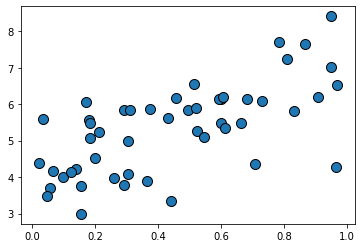

In [15]:
mglearn.discrete_scatter(X, y)

In [23]:
# 선형모델에 넣어보기
from sklearn.svm import LinearSVR 
                  #마진설정
model = LinearSVR(epsilon=1.5).fit(X,y)

In [24]:
# SVM 모델 마진
model, model.epsilon

(LinearSVR(epsilon=1.5), 1.5)

In [30]:
# SVC는 서포트 백터가 있어요 근데 리니어는 선형이라 없는데 찾아서 넣어보겠습니다.
# 굳이 쓸 필요는 없음
# model.support #-> 에러

pred = model.predict(X) # -> 여기서 마진(1.5)보다 큰 값은 마진 바깥에 있는 애들

# 마진 바깥에 있는 값 구하기
off_margin = np.abs(y - pred) >= model.epsilon  # 음수인 값은 절댓값으로 만들어주기 위해 np.abs 사용
print( off_margin )
# 요소별로 그룹화된 0(False)이 아닌 배열의 요소의 인덱스
np.argwhere(off_margin)

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True False False False False False  True False  True  True  True
 False False False  True False False  True False False False False False
 False False]


array([[ 7],
       [25],
       [31],
       [33],
       [34],
       [35],
       [39],
       [42]])

In [35]:
def find_support_vectors(svm_model, X, y) :
    pred = svm_model.predict(X)
    off_margin = np.abs(y - pred) >= svm_model.epsilon 
    return np.argwhere(off_margin)

In [37]:
model.support_ = find_support_vectors(model, X, y)
model.support_

array([[ 7],
       [25],
       [31],
       [33],
       [34],
       [35],
       [39],
       [42]])

In [39]:
# y = 3*X + 4로 했기 때문에 가중치는 3에 가깝게 나와야하고, 절편은 4에 가깝게 나와야 한다 
model.coef_, model.intercept_ 

(array([2.18935348]), array([3.977227]))

(0.0, 1.0, 3.0, 9.0)

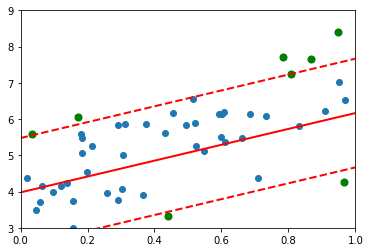

In [54]:
plt.scatter(X, y)

XX = np.linspace(0, 1, 100).reshape(100,1) 
# linspace : 0부터 1까지 100개를 일정한 간격으로 만들 때
# reshape : 차원을 바꿀 때 
XX.shape

y_pred = model.predict(XX)
plt.plot(XX, y_pred, 'r-' ,linewidth=2) # 예측선
plt.plot(XX, y_pred + model.epsilon, 'r--' ,linewidth=2)  # 마진(위의 선)
plt.plot(XX, y_pred - model.epsilon, 'r--' ,linewidth=2)  # 마진(아래의 선)

# 서포트 백터 표시하기 -> 현재는 마진 바깥에 있는 애들을 서포트 백터로 정했기 때문에! 이런 그림이 나옴
plt.scatter(X[model.support_], y[model.support_], s=50, facecolor='g')
plt.axis([0,1,3,9]) # 쉬운 리미트 표현

In [80]:
def plot_svm_reg(svm, X, y, ax, axes):
  ax.plot(X, y, 'bo')
  XX = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
  y_pred = svm.predict(XX)
  ax.plot(XX, y_pred, 'k-' ,linewidth=2)
  ax.plot(XX, y_pred + svm.epsilon, 'k--')
  ax.plot(XX, y_pred - svm.epsilon, 'k--')
  ax.scatter(X[svm.support_], y[svm.support_], s=100, facecolor='red')
  ax.axis( axes )  # 쉬운 리미트표현

  ax.set_title(r"$C={}, \epsilon={}".format(svm.C, svm.epsilon) )

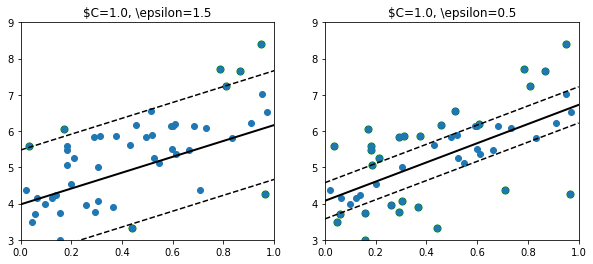

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

model = LinearSVR(epsilon=1.5).fit(X, y)
model.support_ = find_support_vectors(model, X, y)
plot_svm_reg(model, X, y, axes[0], [0, 1, 3, 9])

model = LinearSVR(epsilon=0.5).fit(X, y)
model.support_ = find_support_vectors(model, X, y)
plot_svm_reg(model, X, y, axes[1], [0, 1, 3, 9])

#### SVR

2차 다항 커널을 사용

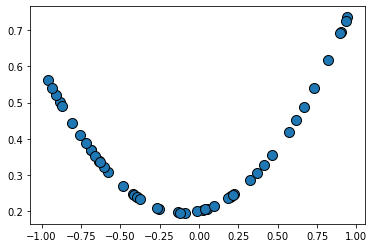

In [70]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1) - 1
y = (0.5 * X**2 + 0.1 * X + 0.2).ravel()
X.shape, y.shape
mglearn.discrete_scatter(X, y)

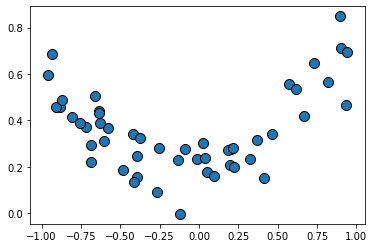

In [72]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1) - 1
y = (0.5 * X**2 + 0.1 * X + 0.2 + np.random.randn(m, 1)/10 ).ravel()
     # 속성(X)이 2개
X.shape, y.shape
mglearn.discrete_scatter(X, y)

In [74]:
from sklearn.svm import SVR # 선형모델은 아님

poly_model = SVR(kernel = 'poly', degree=2, C=100, epsilon=0.1).fit(X,y)
poly_model

SVR(C=100, degree=2, kernel='poly')

In [76]:
poly_model.support_

array([ 1,  4,  5,  6,  7,  9, 22, 23, 24, 25, 27, 29, 31, 33, 34, 35, 39],
      dtype=int32)

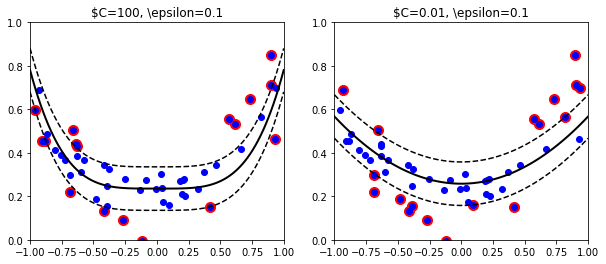

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

model = SVR(kernel = 'poly', degree=4, C=100, epsilon=0.1).fit(X,y) 
# 차수(degree)가 올라가면 최대한 데이터에 맞추려고 하는 복잡한 식으로 됨
# C를 바꾸면 서포트백터가 늘어난다
# epsilon은 마진값 : 거의 고정해놓고
plot_svm_reg(model, X, y, axes[0], [-1, 1, 0, 1])

model = SVR(kernel = 'poly', degree=2, C=0.01, epsilon=0.1).fit(X,y)
plot_svm_reg(model, X, y, axes[1], [-1, 1, 0, 1])

## 장점

- SVM은 강력한 모델이며 다양한 데이터셋에서 잘 작동

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

## 단점
- 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)(컬럼)에 모두 잘 작동하지만 샘플(row)이 많을 때는 잘 맞지 않음

- 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점

- 그런 이유로 대부분 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용

- SVM 모델은 분석하기도 어렵고 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만함

### 기타 특징
- 커널 SVM에서 중요한 매개변수는 C와 gamma이며 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듬

- 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정